<a href="https://colab.research.google.com/github/DmitriyGord/MachineLearningLabs/blob/main/Laba1_NeedDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/playstore-analysis.csv')

Есть датасет о приложениях в Play Market, по этим данным нам нужно понять, является ли приложение платным или бесплатным.

Будем предсказывать это по параметру Type (Free | Paid)

In [ ]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


Удалим неинформативные столбцы данных

In [ ]:
data = data.drop(['App', 'Android Ver', 'Current Ver'], axis='columns')

Также удалим колонку Price, потому что она определяет целевую переменную.

In [ ]:
data = data.drop(['Price'], axis='columns')

Удалим столбец Genres, потому что он в той или иной степени дублирует столбец категорий.

In [ ]:
data = data.drop(['Genres'], axis='columns')

In [ ]:
data.dtypes

Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Content Rating     object
Last Updated       object
dtype: object

In [ ]:
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Заменим в Content Rating:

*   если контент для всех, то будет 1
*   если контент для детей или же только для взрослых, то будет 0


Заменим в Category:

*   вместо названия категории укажем число приложений в этой категории


Installs и Reviews преобразуем к целочисленному типу

Last Update: оставим только год обновления

Type:

*   1, если free
*   0 иначе



In [ ]:
def replace_cr(cr):
  if cr == ('Everyone'):
    return 1
  return 0

data['Content Rating'] = data['Content Rating'].apply(replace_cr)

In [ ]:
counts = data['Category'].value_counts()
nan_count = data['Category'].isnull().sum()

def replace_cat(cat):
  if pd.isnull(cat):
    return nan_count
  return counts[cat]

data['Category'] = data['Category'].apply(replace_cat) 

In [ ]:
def delplus(inst):
  return inst[:-1]

data['Installs'] = data['Installs'].apply(delplus) 

In [ ]:
def strtoint(string):
  if ',' in string:
    return int(string.replace(',',''))
  return string

data['Installs'] = data['Installs'].apply(strtoint)

Удалим запись, которую никак не удалось привести к числу

In [ ]:
data = data.drop([10472])

In [ ]:
data['Installs'] = pd.to_numeric(data['Installs'])

In [ ]:
def textsplit(text):
  return text.split(',')[-1]
  
data['Last Updated'] = data['Last Updated'].apply(textsplit)
data['Last Updated'] = data['Last Updated'].astype(int)


In [ ]:
data['Reviews'] = pd.to_numeric(data['Reviews'])

In [ ]:
def f4free(free):
  if free == ('Free'):
    return 1
  return 0
  
data['Type'] = data['Type'].apply(f4free)

In [ ]:
data.dtypes

Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type                int64
Content Rating      int64
Last Updated        int64
dtype: object

Теперь все столбцы int64 или float64

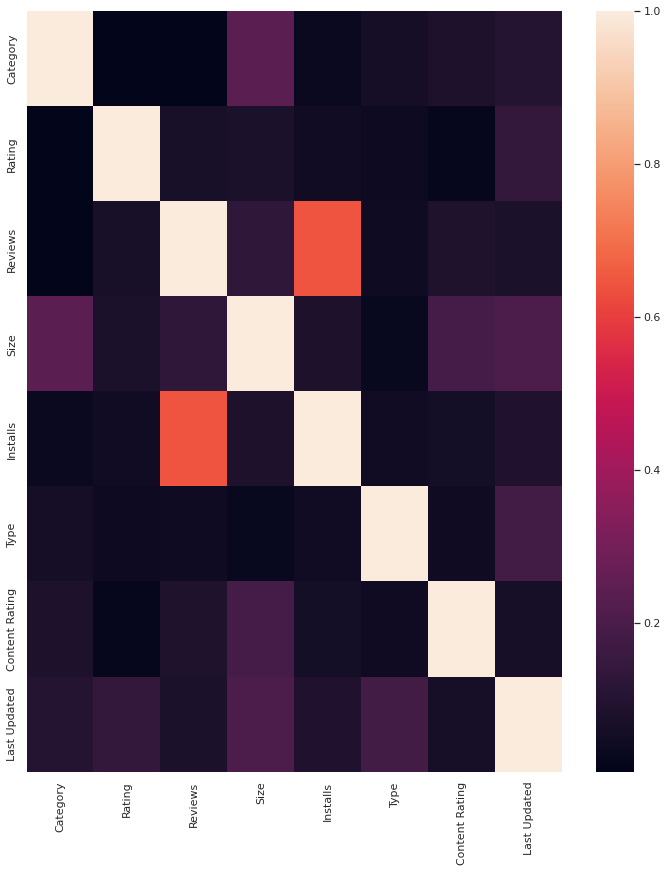

In [ ]:
import seaborn as sns

corr=data.corr().abs()
sns.set(rc={'figure.figsize':(12,14)})
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Данные не особо кореллируют, поэтому оставим все столбцы.

In [ ]:
data.isna().any()

Category          False
Rating             True
Reviews           False
Size              False
Installs           True
Type              False
Content Rating    False
Last Updated      False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10840 non-null  int64  
 1   Rating          9366 non-null   float64
 2   Reviews         10840 non-null  int64  
 3   Size            10840 non-null  float64
 4   Installs        10839 non-null  float64
 5   Type            10840 non-null  int64  
 6   Content Rating  10840 non-null  int64  
 7   Last Updated    10840 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 762.2 KB


Недостающие Rating заполним средним значением 2.5

In [ ]:
def binary_nans(value):
  if pd.isnull(value):
    return 2.5
  return value

for col in ['Rating']:
  data[col] = data [col].apply(binary_nans)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10840 non-null  int64  
 1   Rating          10840 non-null  float64
 2   Reviews         10840 non-null  int64  
 3   Size            10840 non-null  float64
 4   Installs        10839 non-null  float64
 5   Type            10840 non-null  int64  
 6   Content Rating  10840 non-null  int64  
 7   Last Updated    10840 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 762.2 KB


In [ ]:
data[data['Installs'].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Last Updated
9148,1972,2.5,0,21516.529524,NaN,0,0,2018


In [ ]:
data = data.drop([9148])

In [ ]:
data.isna().any()

Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Content Rating    False
Last Updated      False
dtype: bool

In [ ]:
X = data[data.columns.difference(['Type'])]
y = data['Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9280442804428044

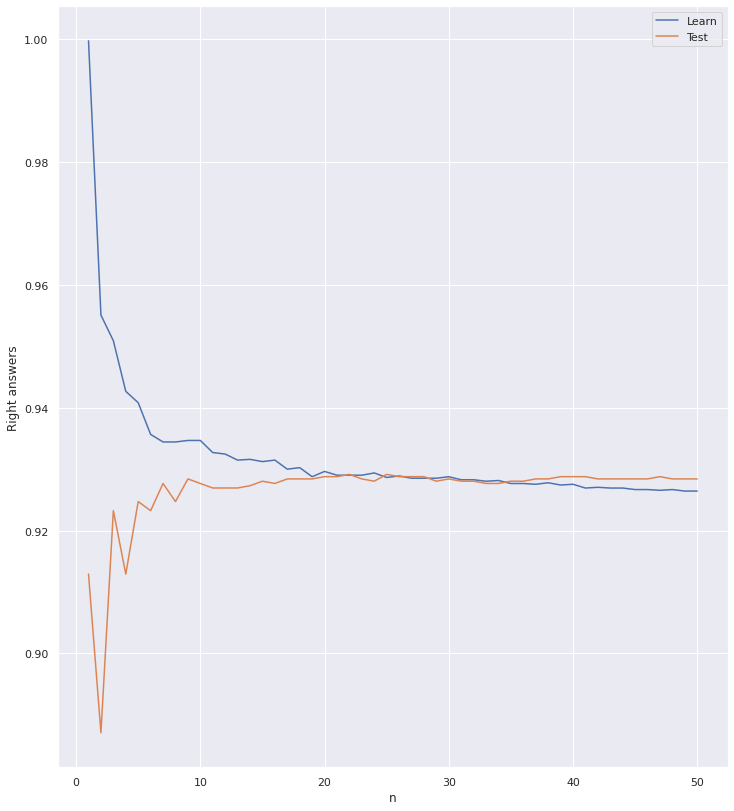

In [ ]:
train_scores = {}
test_scores = {}

for n in range (1,51):
  clf = KNeighborsClassifier(n_neighbors=n)
  clf.fit(X_train, y_train)
  current_train_score = clf.score(X_train, y_train)
  current_test_score = clf.score(X_test, y_test)
  train_scores[n] = current_train_score
  test_scores[n] = current_test_score

plt.plot(np.array(list(train_scores.keys())).astype(float), np.array(list(train_scores.values())).astype(float), label='Learn')
plt.plot(np.array(list(test_scores.keys())).astype(float), np.array(list(test_scores.values())).astype(float), label='Test')
plt.xlabel('n')
plt.ylabel('Right answers')
plt.legend()
plt.show()